In this notebook, First I have done some exploration on the data using matplotlib and seaborn. Then, I use different classifier models to predict the quality of the wine.
1. Random Forest Classifier

2. Stochastic Gradient Descent Classifier

3. Support Vector Classifier(SVC)


Then I use cross validation evaluation technique to optimize the model performance.
1. Grid Search CV

2. Cross Validation Score

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

**Loading Dataset**

In [2]:
wine = pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


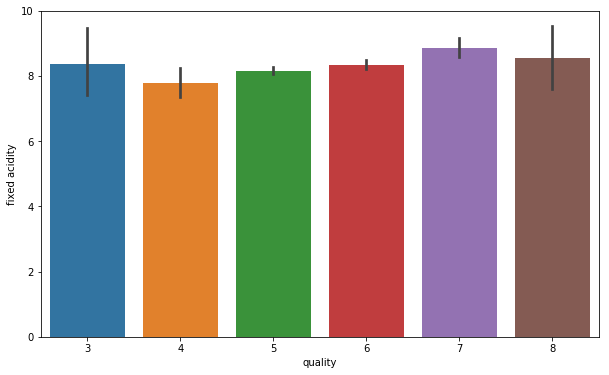

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality",y = "fixed acidity", data = wine)

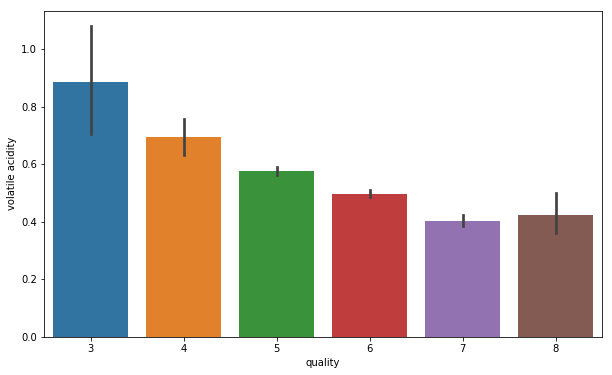

In [6]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "volatile acidity", data = wine)

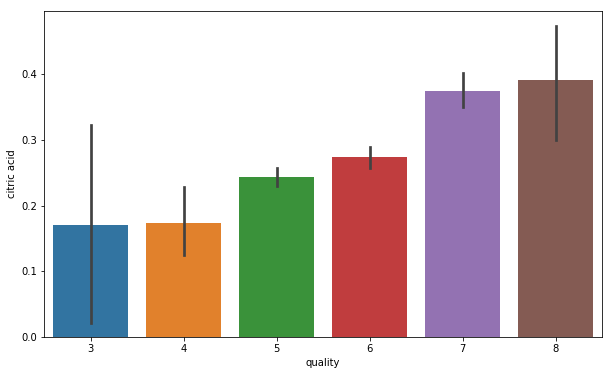

In [7]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "citric acid", data = wine)

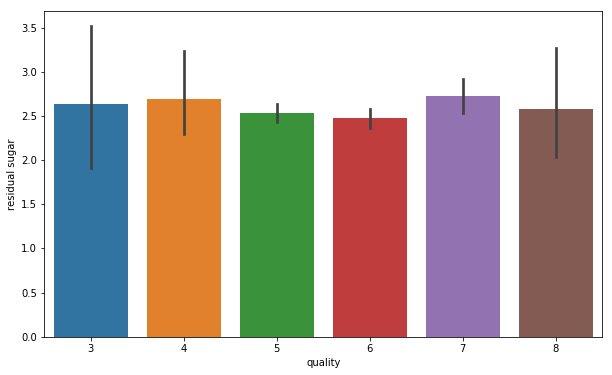

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality" , y = "residual sugar" , data = wine)

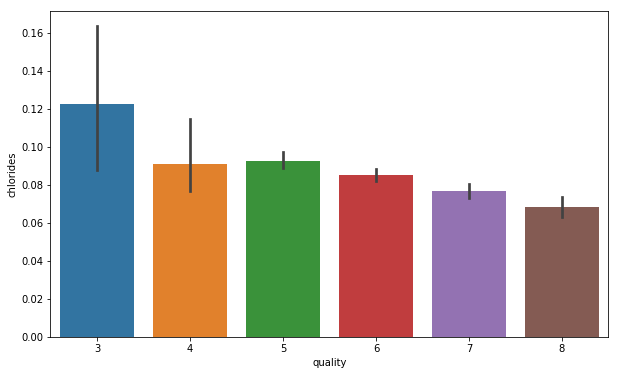

In [10]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "chlorides", data = wine)

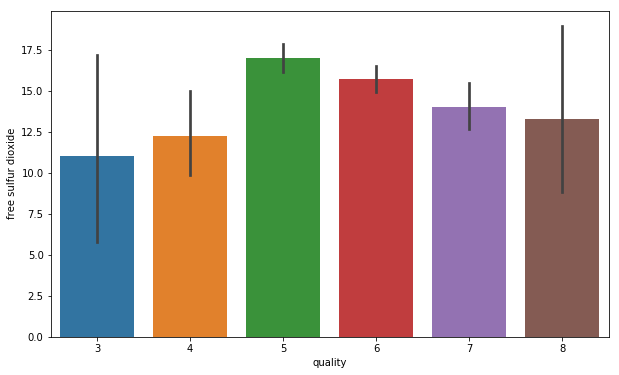

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

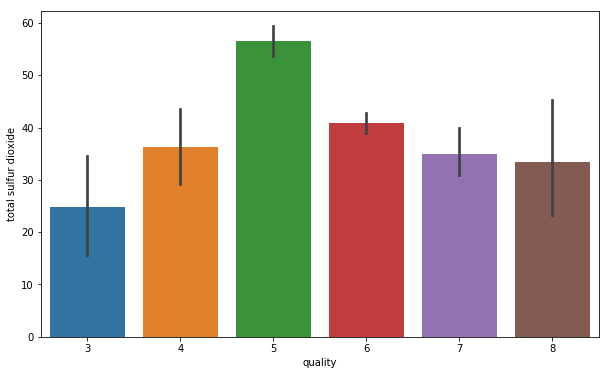

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

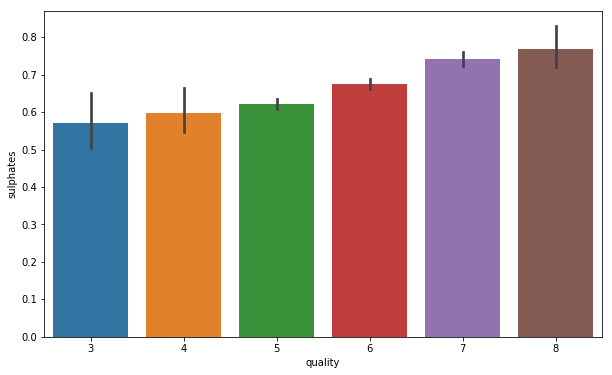

In [13]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

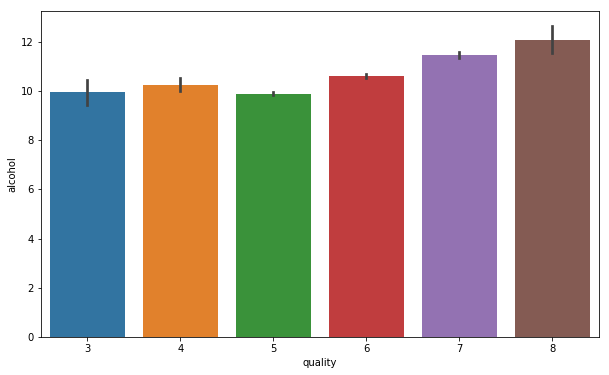

In [14]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

**Preprocessing Data for performing Machine learning algorithms**

In [15]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2,6.5,8)
group_names = ["bad", "good"]
wine["quality"] = pd.cut(wine["quality"], bins = bins, labels = group_names)

In [16]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [17]:
#Bad becomes 0 and good becomes 1 
wine["quality"] = label_quality.fit_transform(wine["quality"])

In [18]:
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

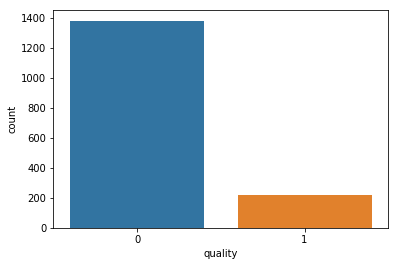

In [19]:
sns.countplot(wine["quality"])

In [20]:
#Now seperate the dataset as response variable and feature variables
X = wine.drop("quality", axis = 1)
y = wine["quality"]

In [21]:
#Train and Test splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [22]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Random Forest Classifier**

In [24]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [26]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       273
           1       0.68      0.45      0.54        47

   micro avg       0.89      0.89      0.89       320
   macro avg       0.79      0.71      0.74       320
weighted avg       0.88      0.89      0.88       320



**Random forest gives the accuracy of 88%**

In [27]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 26  21]]


**Stochastic Gradient Decent Classifie**

In [44]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [45]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       273
           1       0.50      0.55      0.53        47

   micro avg       0.85      0.85      0.85       320
   macro avg       0.71      0.73      0.72       320
weighted avg       0.86      0.85      0.86       320



In [46]:
print(confusion_matrix(y_test, pred_sgd))

[[247  26]
 [ 21  26]]


**Support Vector Classifier**

In [55]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [56]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



**Support vector classifier gets 86%**

## Let's try to increase our accuracy of models

**Grid Search CV**

In [57]:
# Finding best parameter for svc model
param = {
    'C' : [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy', cv = 10)

In [58]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
# Best parameter for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [60]:
#Lets run our SVC again with best parameters
svc2 = SVC(C = 1.2, gamma = 0.9, kernel = 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc.predict(X_test)

In [61]:
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



**Cross Validation Score for random forest**

In [62]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9140194389763779

**Random forest accuracy increases from 87% to 91 % using cross validation score**